In [8]:
#Valeurs recherchées:
#1)Pente journalière 
#2)C1
#3)HDR

In [12]:
#Modules
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
doc=pd.read_csv("/users/2024/ds2/119008303/Documents/KinectDataGreenhouse/Box1_Temoin.csv")

In [14]:
doc
#Te=15 minutes et T=1 jour, X est le temps en minutes
T=96 #96*Te= 1 jour
X=np.array(doc['X']).reshape(-1,1) #temps (i unité vaut 15 minutes)
Y=np.array(doc['Y'])

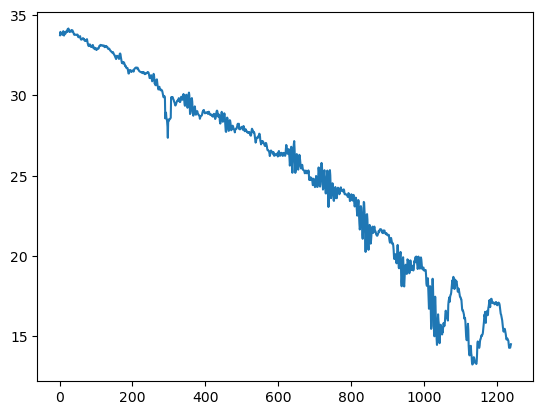

In [15]:
plt.plot(X,Y) 

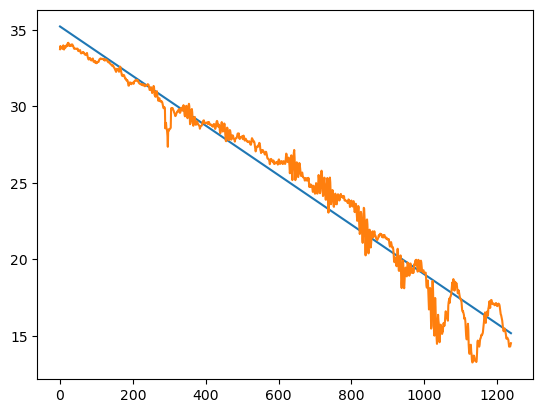

In [18]:
#Regression linéaire
r1=LinearRegression()
r1.fit(X,Y)
plt.plot(r1.predict(X))
plt.plot(Y)

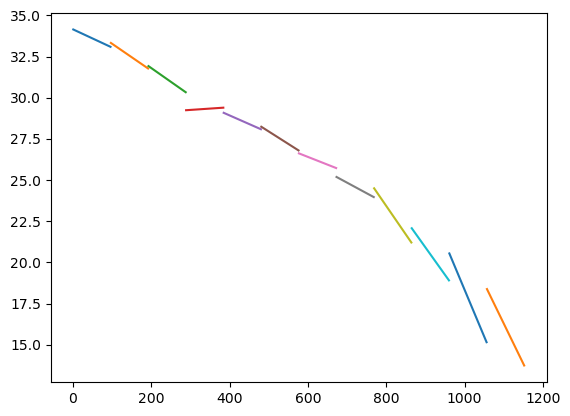

In [59]:
#Création des groupes
def jour(k):
    return [X[(k*T):((k+1)*T)],Y[(k*T):((k+1)*T)]]

N=int(len(X)/96) #nombre de jours d'échantillonage
#Affichage des N penstes journalières
Pred=[]
for i in range(N):
    Xr,Yr=jour(i)[0],jour(i)[1]
    r1=LinearRegression()
    r1.fit(Xr,Yr)
    Pred.append(r1.predict(Xr))
    plt.plot(Xr,r1.predict(Xr))

In [60]:
#Fonction donnant la pente journalière d'un jour:
def Pente(n):
    Xr,Yr=jour(i)[0],jour(i)[1]
    r1=LinearRegression()
    r1.fit(Xr,Yr)
    return r1.predict(Xr)

In [61]:
#2) Calcul du C1
#coefficients a1 et b1
def a(n):
    if n==0:
        return (1/T)*np.sum((Pente(n)*np.cos(2*np.pi*Pente(n)/T)))
    else:
        return (2/T)*np.sum((Pente(n)*np.cos(2*np.pi*Pente(n)/T)))
def b(n):
    return (2/T)*np.sum((Pente(n)*np.sin(2*np.pi*Pente(n)/T)))

In [64]:
def Fourier(n): #n désigne le jour
    a0=a(0)
    an,bn=a(n),b(n)
    cn=np.sqrt(an**2+bn**2)
    E=np.sum((jour(0)[1]))/T
    HDR=100*np.sqrt((E-0.5*cn**2)/(0.5*cn**2))
    return a0,an,bn,cn,HDR

In [65]:
Fourier(1)

/tmp/ipykernel_3931/3187109727.py:6: RuntimeWarning: invalid value encountered in sqrt
  HDR=100*np.sqrt((E-0.5*cn**2)/(0.5*cn**2))


(7.841494910081647,
 15.682989820163295,
 27.879948367367437,
 31.98824300686769,
 nan)

In [101]:
len(X)/96 #nombre de jours d'échantillonage

12.90625

In [149]:
Tabjour=[]
for i in range(1,12):
    a0,an,bn,cn,HDR=Fourier(i)
    Tabjour.append([a0,an,bn,cn,HDR])
print(Tabjour[1][4])

1481.4142026164186
